In [1]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

Welcome to JupyROOT 6.26/08


In [11]:
def file_conversion(input_file, output_file):
    f = open(const.REF_DIR+f"/{input_file}")

    lines = []
    for line in f.readlines():

        l = line.split(",")
        temp = []
        for s in l:
            s = s.replace("'", '')
            s = s.replace("[", '')
            s = s.replace("]", '')
            try:
                temp.append(float(s))
            except:
                continue
        if len(temp)>0:

            lines.append(temp)

    lines = np.asarray(lines)
    print(lines)
    tab = Table(lines, names = ["x", "dNdE", "mass"])
#    tab = Table(lines, names = ["mass", "signu"])
    np.save(const.REF_DIR+f"/{output_file}.npy",tab)
    
def change_file(new, old):
    os.system("mv "+const.REF_DIR+f"/wino_dnde.npy "+const.REF_DIR+f"/{old}.npy" )
    os.system("mv "+const.REF_DIR+f"/{new}.npy "+const.REF_DIR+f"/wino_dnde.npy" )

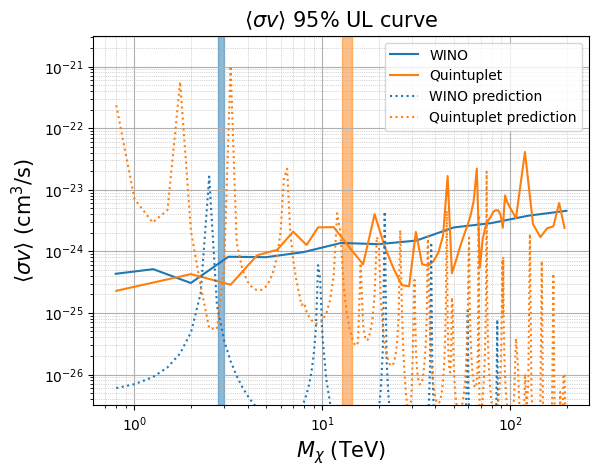

In [177]:
#plotULcurve("EventDisplay_WINO_unbinned_shifted_old", label="Mid 2024", units="TeV")
#plotULcurve("wino_final_latest",  label="Late 2024", units="TeV")
plotULcurve("wino_final_latest_bin_ctr",  label="WINO", units="TeV")
plotULcurve("EventDisplay_QLET_unbinned_old", label="Quintuplet", units="TeV")

plotPredictedLine(units="TeV", color="C0", ls=":")
plotPredictedLine(quintuplet=True, label="Quintuplet prediction", units="TeV", color="C1", ls=":")
plt.axvspan(2.8, 3, color="C0", alpha=0.5)
plt.axvspan(13.6-0.8, 13.6+0.8, color="C1", alpha=0.5)
plt.legend(loc=1)

In [46]:
from scipy.integrate import simps

In [9]:
m

1250.0

In [343]:
change_file("dnde_wino_final", "dnde_wino_endpoint")

mv: /Users/dtak/Research/DarkMatter/RefData//wino_dnde.npy: No such file or directory


In [431]:
irf = ResponseFunction.EventDisplay.readIRFs("Segue_1", ext=True)
jProfile = JProfile.generateConvolvedJ("Segue_1", "EventDisplay", return_array=True, seed = defaultNum["Segue_1"], verbose=False, ext=True)


In [424]:
uls = np.load(const.OUTPUT_DIR+"quintuplet_final.npy")

In [425]:
uls

array([[ 8.00000000e+02, -2.48536621e+01],
       [ 1.00000000e+03, -2.46849757e+01],
       [ 1.25000000e+03, -2.48684205e+01],
       [ 1.50000000e+03, -2.51984264e+01],
       [ 1.75000000e+03, -2.51363772e+01],
       [ 2.00000000e+03, -2.47696259e+01],
       [ 2.25000000e+03, -2.47560749e+01],
       [ 2.50000000e+03, -2.51643790e+01],
       [ 2.75000000e+03, -2.52921432e+01],
       [ 3.00000000e+03, -2.48935407e+01],
       [ 3.25000000e+03, -2.48271955e+01],
       [ 3.50000000e+03, -2.47545906e+01],
       [ 3.75000000e+03, -2.46977593e+01],
       [ 4.25000000e+03, -2.46981676e+01],
       [ 4.50000000e+03, -2.46606686e+01],
       [ 4.75000000e+03, -2.46146647e+01],
       [ 5.00000000e+03, -2.45731114e+01],
       [ 5.25000000e+03, -2.46288518e+01],
       [ 5.50000000e+03, -2.45932256e+01],
       [ 5.75000000e+03, -2.45652565e+01],
       [ 6.00000000e+03, -2.45365219e+01],
       [ 6.25000000e+03, -2.45054984e+01],
       [ 6.50000000e+03, -2.43609950e+01],
       [ 6.

In [432]:
data = Qspectra(return_table=True)

mass = list(set(data["mass"]))
mass.sort()


In [339]:
change_file("dnde_wino_final", "dnde_wino_endpoint")

mv: rename /Users/dtak/Research/DarkMatter/RefData//dnde_wino_final.npy to /Users/dtak/Research/DarkMatter/RefData//wino_dnde.npy: No such file or directory


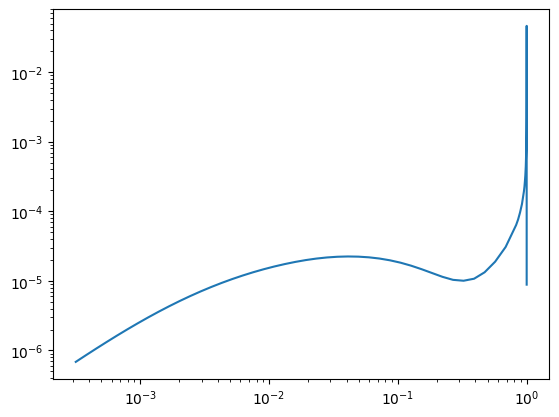

In [459]:
tab = data[data["mass"]==1.82500000e+05]
plt.loglog(tab["x"], tab["x"]**2*tab["dNdE"])

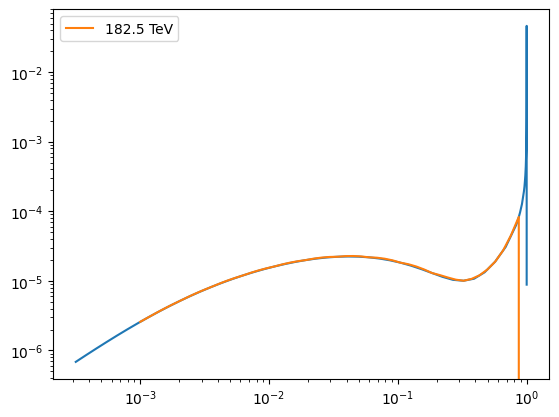

In [461]:
x = np.geomspace(1e-3, 1)
#plt.loglog(x, x**2*Qspectra(x, 1.80000000e+05)[0], label="180 TeV")
plt.loglog(tab["x"], tab["x"]**2*tab["dNdE"])
plt.loglog(x, x**2*Qspectra(x, 1.82500000e+05)[0], label="182.5 TeV")
# plt.loglog(x, x**2*Qspectra(x, 1.85000000e+05)[0], label="185 TeV")
# plt.loglog(x, x**2*Qspectra(x, 1.87500000e+05)[0], label="187.5 TeV")
# plt.loglog(x, x**2*Qspectra(x, 1.90000000e+05)[0], label="190 TeV")
plt.legend()

In [436]:
data["mass"] == 1.85000000e+05

array([False, False, False, ..., False, False, False])

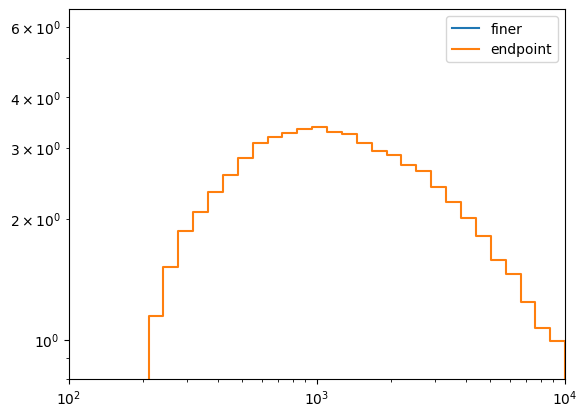

In [433]:
signal = combinedCalcSignal("Segue_1", 1.85000000e+05, channel="quintuplet",  jProfile=jProfile, ext=True, irf=irf)
signal2 = combinedCalcSignal("Segue_1", 1.87500000e+05, channel="quintuplet",  jProfile=jProfile, ext=True, irf=irf)
plt.step(*getArray(signal), where="mid", label="finer")
plt.step(*getArray(signal2), where="mid", label="endpoint")

plt.xscale("log")
plt.yscale("log")
plt.ylim(0.8,)
plt.xlim(100, 10000)
plt.legend()


----------


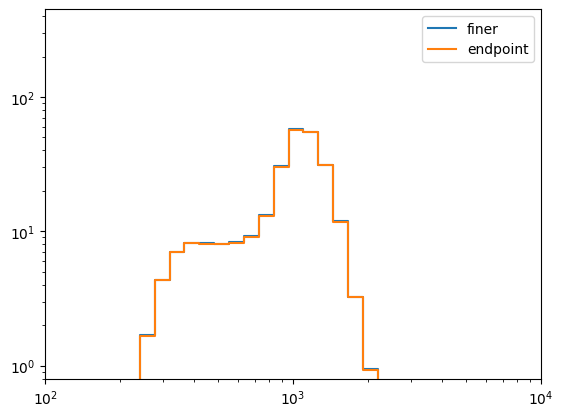

In [404]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))
mass.sort()


signal = combinedCalcSignal("Segue_1", mass[2], channel="WINO",  jProfile=jProfile, ext=True, irf=irf)

change_file("dnde_wino_endpoint", "dnde_wino_final")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))
mass.sort()

print("-"*10)

signal3 = combinedCalcSignal("Segue_1", mass[1], channel="WINO", jProfile=jProfile, ext=True, irf=irf)

change_file("dnde_wino_final", "dnde_wino_endpoint")

plt.step(*getArray(signal), where="mid", label="finer")
plt.step(*getArray(signal3), where="mid", label="endpoint")

plt.xscale("log")
plt.yscale("log")
plt.ylim(0.8,)
plt.xlim(100, 10000)
plt.legend()


In [351]:
from scipy.interpolate import RegularGridInterpolator

In [354]:
signal2 = combinedCalcSignal("Segue_1", 1258.9254117941675, channel="WINO",  jProfile=jProfile, ext=True, irf=irf)

In [194]:
1412.5375446227554/1258.9254117941675

1.122018454301964

In [209]:
change_file("dnde_wino_endpoint", "dnde_wino_final")

In [415]:
irf = ResponseFunction.EventDisplay.readIRFs("Segue_1", ext=True)
jProfile = JProfile.generateConvolvedJ("Segue_1", "EventDisplay", 
                                       return_array=True, 
                                       seed = defaultNum["Segue_1"], 
                                       verbose=False, ext=True)

In [213]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [218]:
const.OUTPUT_DIR

'/Users/dtak/Research/DarkMatter/Output/'

In [219]:
np.load("/Users/dtak/Research/DarkMatter/Output/wino_finer_final_in_low.npyb")

array([[ 800.        ,  -24.97415645],
       [1000.        ,  -24.84358746],
       [1250.        ,  -25.01107765],
       [1500.        ,  -25.31132745],
       [1750.        ,  -25.27048949],
       [2000.        ,  -24.98168762]])

In [418]:
change_file("dnde_wino_endpoint", "dnde_wino_final")

In [419]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

s_cnts4 = []

for m in tqdm(mass):
    signal2 = combinedCalcSignal("Segue_1", m, channel="WINO", jProfile=jProfile, ext=True, irf=irf)
    s_cnts4.append([m, sum(getArray(signal2)[1])])

  0%|          | 0/13 [00:00<?, ?it/s]

In [420]:
s_cnts4 = np.asarray(s_cnts4)
s_cnts3 = np.asarray(s_cnts3)
s_cnts2 = np.asarray(s_cnts2)
s_cnts = np.asarray(s_cnts)

Text(0, 0.5, 'Total counts')

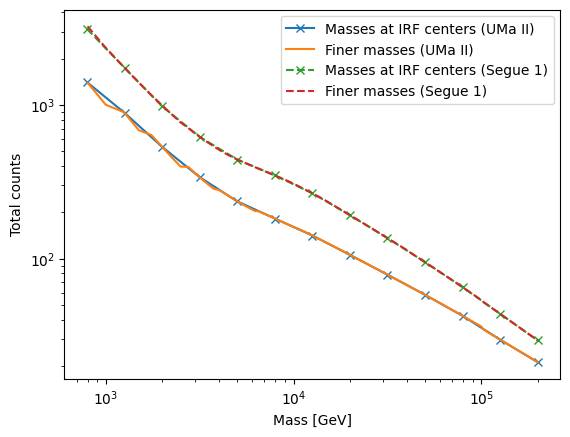

In [421]:
plt.plot(s_cnts[:,0], s_cnts[:,1], label="Masses at IRF centers (UMa II)", marker="x")
plt.plot(s_cnts2[:,0], s_cnts2[:,1], label="Finer masses (UMa II)")
plt.plot(s_cnts4[:,0], s_cnts4[:,1], label="Masses at IRF centers (Segue 1)", ls="--", marker="x")
plt.plot(s_cnts3[:,0], s_cnts3[:,1], label="Finer masses (Segue 1)", ls="--")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Mass [GeV]")
plt.ylabel("Total counts")

(100, 10000)

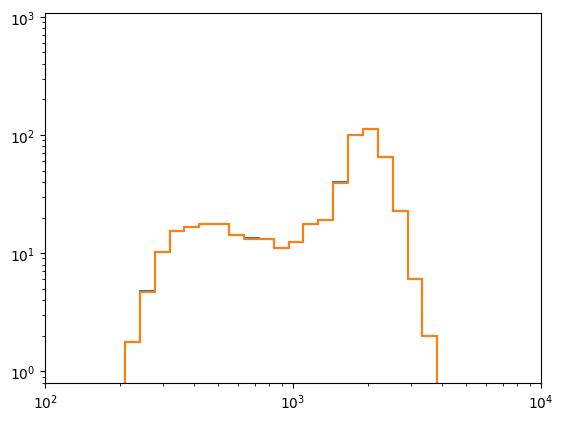

In [77]:
plt.step(*getArray(signal), where="mid")
plt.step(*getArray(signal2), where="mid")

plt.xscale("log")
plt.yscale("log")
plt.ylim(0.8,)
plt.xlim(100, 10000)

In [84]:
simps(test["dNdE"][:-1], test["x"][:-1])

0.2383143734059307

In [85]:
test["dNdE"][-1]

0.0009101840164077419

In [81]:
test = data[data["mass"]==m]

In [103]:
m

5011.872336272727

(100, 10000)

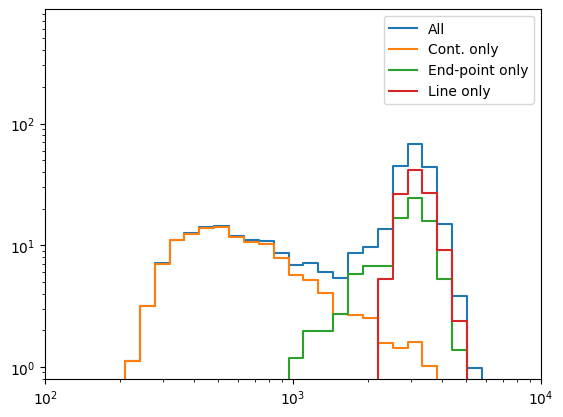

In [109]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

m = mass[3]


signal2 = combinedCalcSignal("UMa_II", m, channel="WINO", jProfile=jProfile, ext=True, irf=irf)


plt.step(*getArray(signal), where="mid", label="All")
plt.step(*getArray(signal4), where="mid", label="Cont. only")
plt.step(*getArray(signal2), where="mid", label="End-point only")
plt.step(*getArray(signal3), where="mid", label="Line only")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylim(0.8,)
plt.xlim(100, 10000)

In [180]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

uls = np.load(const.OUTPUT_DIR+"wino_UMa_II_final_latest.npy")

expected_cnts_5 = [sum(getArray(combinedCalcSignal("UMa_II", m, channel="WINO", jProfile=jProfile, ext=True, irf=irf))[1]) for m in mass]


2000.0


(200, 8034.815500166936)

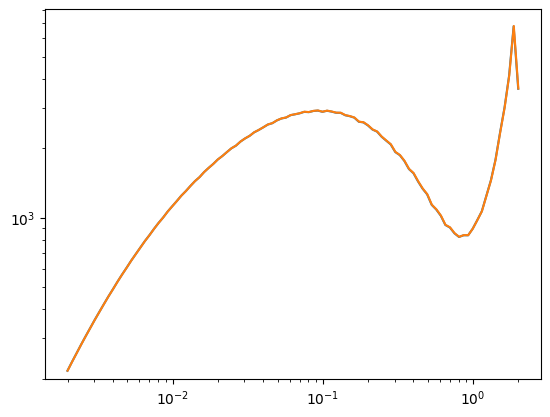

In [26]:
change_file("dnde_results_binCent", "dnde_wino_old")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

m = mass[2]

plt.plot(np.logspace(-3, 0, 100)*m/1000, np.logspace(-3, 0, 100)**2*m**2*WINOspectra(np.logspace(-3, 0, 100), m))
#signal = combinedCalcSignal("UMa_II", m, channel="WINO", jProfile=jProfile, ext=True, irf=irf)

#plt.step(*getArray(signal), where="mid")
plt.xscale("log")
plt.yscale("log")
plt.ylim(0.8,)

change_file("dnde_wino_old", "dnde_results_binCent")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

m = mass[5]
print(m)

plt.plot(np.logspace(-3, 0, 100)*m/1000, np.logspace(-3, 0, 100)**2*m**2*WINOspectra(np.logspace(-3, 0, 100), m))
#signal = combinedCalcSignal("UMa_II", m, channel="WINO", jProfile=jProfile, ext=True, irf=irf)

#plt.step(*getArray(signal), where="mid")
plt.xscale("log")
plt.yscale("log")
plt.ylim(200,)

In [179]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

uls = np.load(const.OUTPUT_DIR+"wino_UMa_II_final_latest.npy")

ideal_cnts_5 = [sum(getArray(combinedCalcSignal("UMa_II", m, channel="WINO", jProfile=jProfile, ext=True, irf=irf, ideal=True))[1]) for m in mass]


Warning in <TROOT::Append>: Replacing existing TH1: hg_1D (Potential memory leak).


In [55]:
import matplotlib.colors as mcolors

In [ ]:
ul

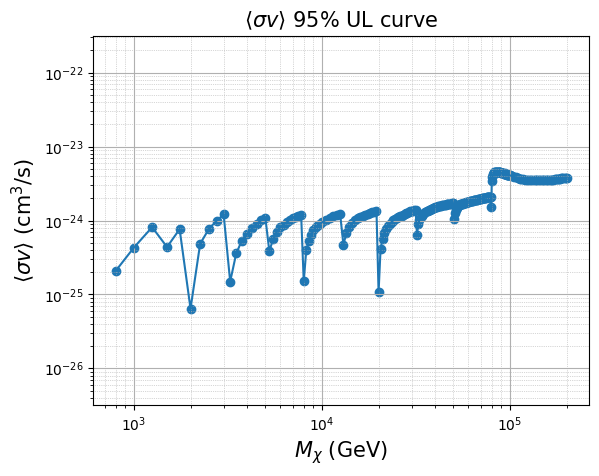

In [137]:
plotULcurve("wino_UMa_II_final_latest")
plt.scatter(uls[:,0], 10**uls[:,1])

(0.01, 10)

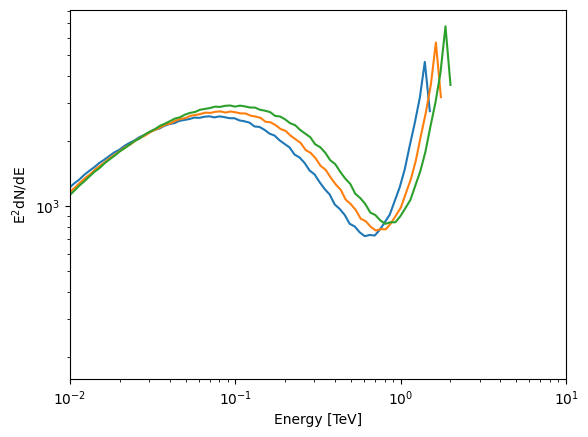

In [115]:
plt.plot(np.logspace(-3, 0, 100)*mass[3]/1000, np.logspace(-3, 0, 100)**2*mass[3]**2*WINOspectra(np.logspace(-3, 0, 100), mass[3]))
plt.plot(np.logspace(-3, 0, 100)*mass[4]/1000, np.logspace(-3, 0, 100)**2*mass[4]**2*WINOspectra(np.logspace(-3, 0, 100), mass[4]))
plt.plot(np.logspace(-3, 0, 100)*mass[5]/1000, np.logspace(-3, 0, 100)**2*mass[5]**2*WINOspectra(np.logspace(-3, 0, 100), mass[5]))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy [TeV]")
plt.ylabel(r"E$^2$dN/dE")
plt.xlim(0.01, 10)

Text(0, 0.5, 'Counts')

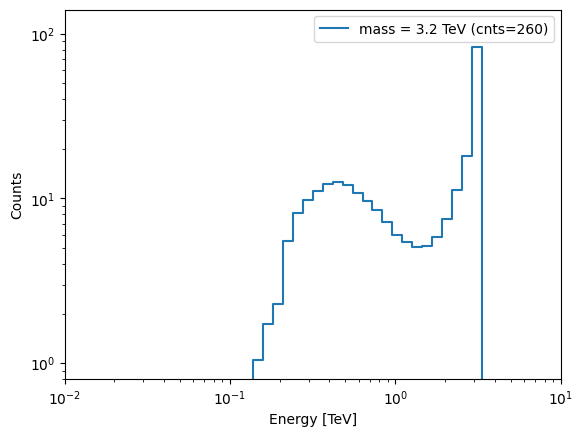

In [182]:
ul = getArray(combinedCalcSignal("UMa_II", mass[3], channel="WINO", jProfile=jProfile, ext=True, irf=irf, ideal=True))
plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[3]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")

# ul = getArray(combinedCalcSignal("UMa_II", mass[4], channel="WINO", jProfile=jProfile, ext=True, irf=irf, ideal=True))
# plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[4]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")

# ul = getArray(combinedCalcSignal("UMa_II", mass[5], channel="WINO", jProfile=jProfile, ext=True, irf=irf, ideal=True))
# plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[5]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.01, 10)
plt.ylim(0.8,)
plt.xlabel("Energy [TeV]")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

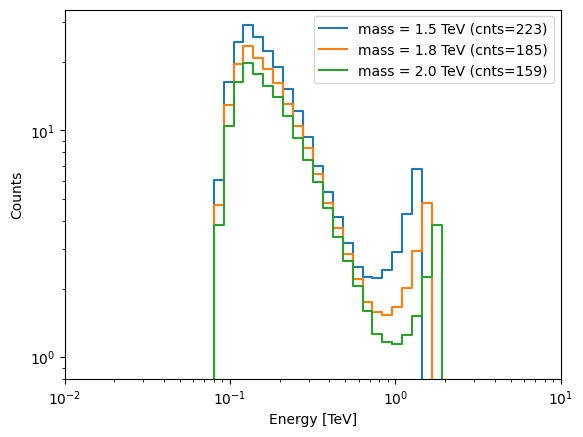

In [113]:
ul = getArray(combinedCalcSignal("UMa_II", mass[3], channel="WINO", jProfile=jProfile, ext=True, irf=irf, ideal=True, fixedA = 10000))
plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[3]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")

ul = getArray(combinedCalcSignal("UMa_II", mass[4], channel="WINO", jProfile=jProfile, ext=True, irf=irf, ideal=True, fixedA = 10000))
plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[4]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")

ul = getArray(combinedCalcSignal("UMa_II", mass[5], channel="WINO", jProfile=jProfile, ext=True, irf=irf, ideal=True, fixedA = 10000))
plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[5]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.01, 10)
plt.ylim(0.8,)
plt.xlabel("Energy [TeV]")
plt.ylabel("Counts")

In [122]:
getArray(irf.EA)

(array([-1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,
         0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,
         2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.20827872e-01, 6.51378531e+01, 2.67399633e+03, 2.04786849e+04,
        5.03570508e+04, 7.70842615e+04, 1.00846222e+05, 1.20655922e+05,
        1.38728829e+05, 1.49080099e+05, 1.56678849e+05, 1.58008337e+05,
        1.56999138e+05, 1.49837378e+05, 1.39605302e+05, 1.27866824e+05,
        1.09943442e+05, 7.60000624e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]))

(0.01, 10)

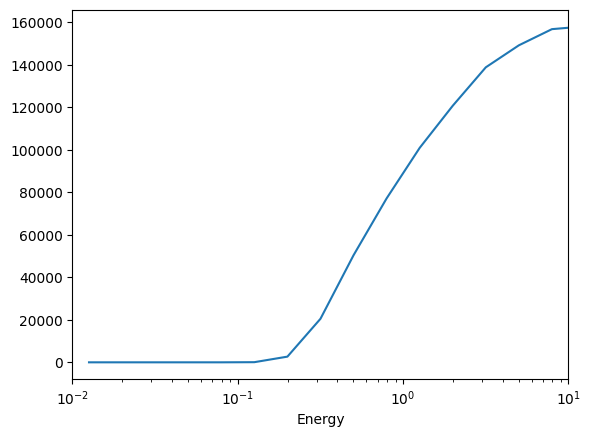

In [132]:
ea = getArray(irf.EA)
plt.plot(10**ea[0], ea[1])
plt.xlabel("Energy")
plt.xscale("log")
plt.xlim(1e-2, 10)

Text(0, 0.5, 'Counts')

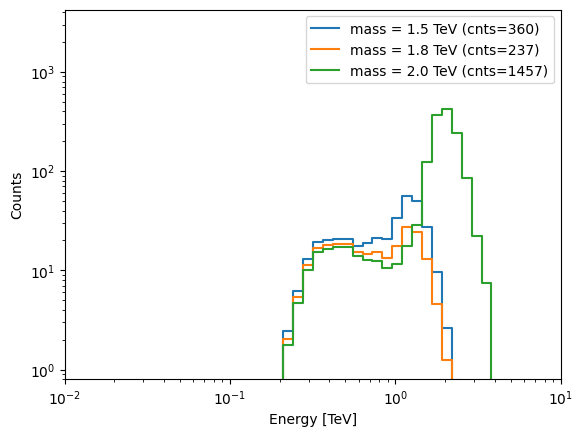

In [102]:
ul = getArray(combinedCalcSignal("UMa_II", mass[3], channel="WINO", jProfile=jProfile, ext=True, irf=irf))
plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[3]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")

ul = getArray(combinedCalcSignal("UMa_II", mass[4], channel="WINO", jProfile=jProfile, ext=True, irf=irf))
plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[4]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")

ul = getArray(combinedCalcSignal("UMa_II", mass[5], channel="WINO", jProfile=jProfile, ext=True, irf=irf))
plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[5]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")


plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.01, 10)
plt.ylim(0.8,)
plt.xlabel("Energy [TeV]")
plt.ylabel("Counts")

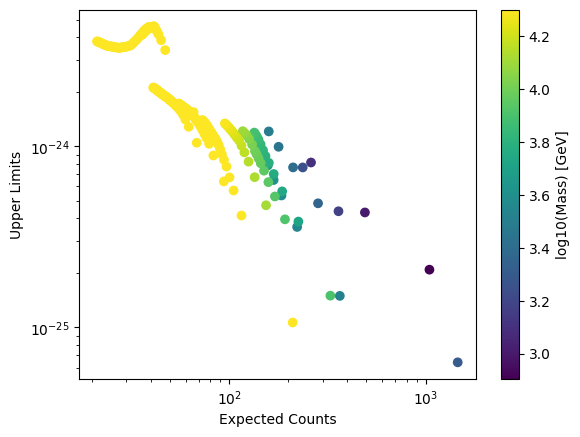

In [56]:
mass_log = np.log10(mass)

# Create scatter plot with colormap
sc = plt.scatter(expected_cnts_5, 10**uls[:, 1], c=mass_log, cmap="viridis", norm=mcolors.Normalize(vmin=np.log10(800), vmax=np.log10(20000)))

plt.xscale("log")
plt.yscale("log")

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label("log10(Mass) [GeV]")

plt.xlabel("Expected Counts")
plt.ylabel("Upper Limits")

plt.show()

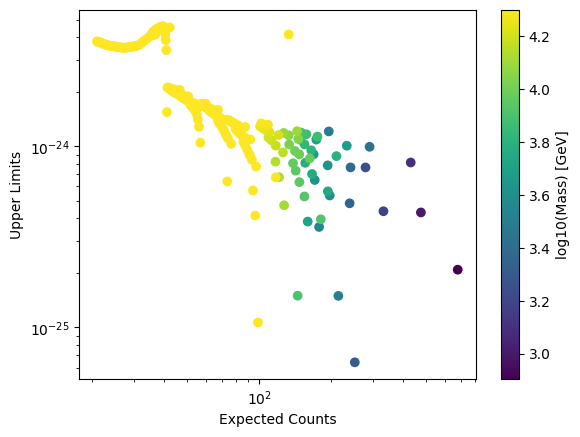

In [101]:
mass_log = np.log10(mass)

# Create scatter plot with colormap
sc = plt.scatter(ideal_cnts_5, 10**uls[:, 1], c=mass_log, cmap="viridis", norm=mcolors.Normalize(vmin=np.log10(800), vmax=np.log10(20000)))

plt.xscale("log")
plt.yscale("log")

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label("log10(Mass) [GeV]")

plt.xlabel("Expected Counts")
plt.ylabel("Upper Limits")

plt.show()

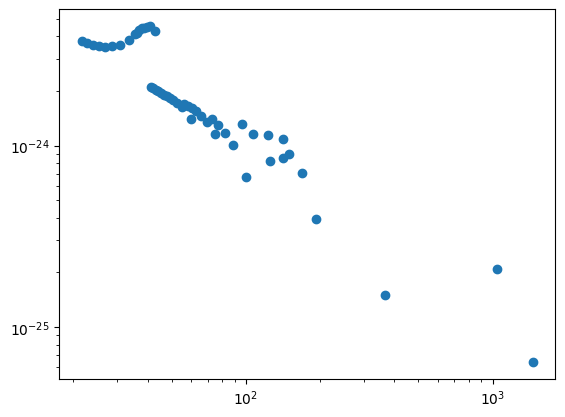

In [48]:
plt.scatter(expected_cnts_5, 10**uls[:,1][::5])
plt.xscale("log")
plt.yscale("log")

(0.01, 10)

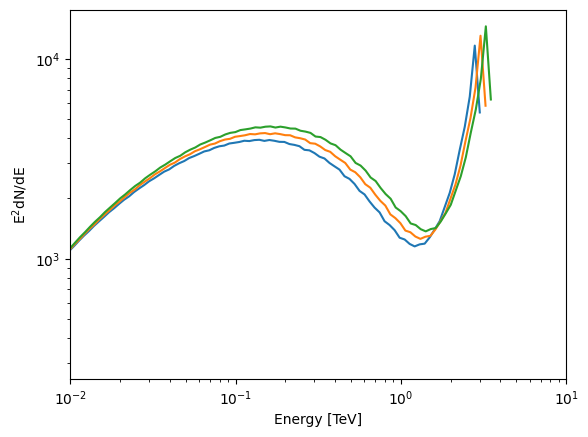

In [138]:
idx = 9
plt.plot(np.logspace(-3, 0, 100)*mass[idx]/1000, np.logspace(-3, 0, 100)**2*mass[idx]**2*WINOspectra(np.logspace(-3, 0, 100), mass[idx]))
plt.plot(np.logspace(-3, 0, 100)*mass[idx+1]/1000, np.logspace(-3, 0, 100)**2*mass[idx+1]**2*WINOspectra(np.logspace(-3, 0, 100), mass[idx+1]))
plt.plot(np.logspace(-3, 0, 100)*mass[idx+2]/1000, np.logspace(-3, 0, 100)**2*mass[idx+2]**2*WINOspectra(np.logspace(-3, 0, 100), mass[idx+2]))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy [TeV]")
plt.ylabel(r"E$^2$dN/dE")
plt.xlim(0.01, 10)

Text(0, 0.5, 'Counts')

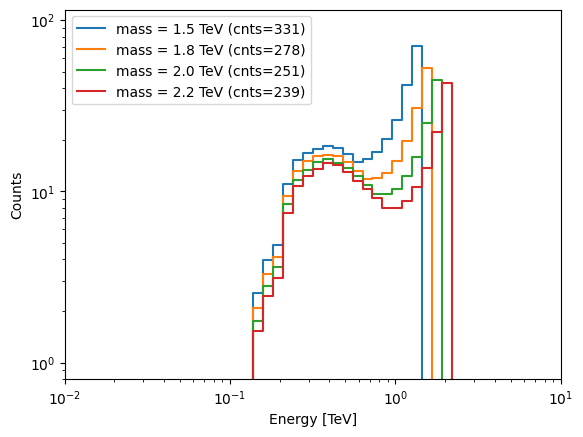

In [165]:
idx = 3
for i in range(4):
    ul = getArray(combinedCalcSignal("UMa_II", mass[idx+i], channel="WINO", jProfile=jProfile, ext=True, irf=irf, ideal=True))
    plt.step(ul[0]/1000, ul[1], where="mid", label=f"mass = {mass[idx+i]/1000:.1f} TeV (cnts={sum(ul[1]):.0f})")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.01, 10)
plt.ylim(0.8,)
plt.xlabel("Energy [TeV]")
plt.ylabel("Counts")

In [167]:
np.arange(-1.9, 3.91, step=0.2)

array([-1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,
        0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,
        2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9])

In [166]:
getArray(irf.Bias)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,
         0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,
         2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9]),
 array([0.02, 0.06, 0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42,
        0.46, 0.5 , 0.54, 0.58, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86,
        0.9 , 0.94, 0.98, 1.02, 1.06, 1.1 , 1.14, 1.18, 1.22, 1.26, 1.3 ,
        1.34, 1.38, 1.42, 1.46, 1.5 , 1.54, 1.58, 1.62, 1.66, 1.7 , 1.74,
        1.78, 1.82, 1.86, 1.9 , 1.94, 1.98, 2.02, 2.06, 2.1 , 2.14, 2.18,
        2.22, 2.26, 2.3 , 2.34, 2.38, 2.42, 2.46, 2.5 , 2.54, 2.58, 2.62,
        2.66, 2.7 , 2.74, 2.78, 2.82, 2.86, 2.9 , 2.94, 2.98]))

In [153]:
3.2-10**getArray(irf.Bias)[1]

array([ 3.18741075e+00,  3.18004738e+00,  3.16837722e+00,  3.14988128e+00,
        3.12056718e+00,  3.07410746e+00,  3.00047377e+00,  2.88377223e+00,
        2.69881277e+00,  2.40567177e+00,  1.94107459e+00,  1.20473769e+00,
        3.77223398e-02, -1.81187234e+00, -4.74328235e+00, -9.38925412e+00,
       -1.67526231e+01, -2.84227766e+01, -4.69187234e+01, -7.62328235e+01,
       -1.22692541e+02, -1.96326231e+02, -3.13027766e+02, -4.97987234e+02,
       -7.91128235e+02, -1.25572541e+03, -1.99206231e+03, -3.15907766e+03,
       -5.00867234e+03, -7.94008235e+03])

Text(0, 0.5, 'abs(Mass - Energy)')

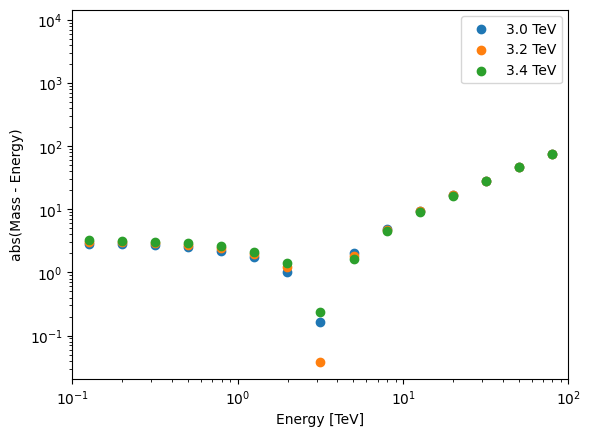

In [162]:
plt.scatter(10**getArray(irf.Bias)[1], np.abs(3.0-10**getArray(irf.Bias)[1]), label="3.0 TeV")
plt.scatter(10**getArray(irf.Bias)[1], np.abs(3.2-10**getArray(irf.Bias)[1]), label="3.2 TeV")
plt.scatter(10**getArray(irf.Bias)[1], np.abs(3.4-10**getArray(irf.Bias)[1]), label="3.4 TeV")

plt.legend()
plt.xlim(0.1, 100)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy [TeV]")

plt.ylabel("abs(Mass - Energy)")

In [146]:
getArray(irf.Bias)[1]

array([-1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,
        0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,
        2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9])